# Mahyar Mohammadi - 610398116 - MiniProject2

In [90]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tabulate import tabulate

## Read data from CSV

In [7]:
train = pd.read_csv("train_set.csv")
test = pd.read_csv("test_set.csv")

#  show data

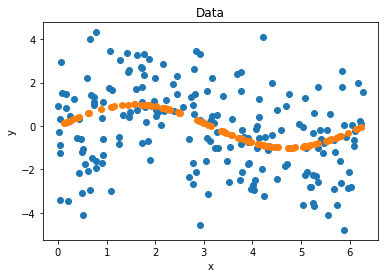

In [8]:
plt.scatter(train.x,train.target)
plt.scatter(test.x,test.target)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Data")
pass

# linear Regression
## $ Y_i = b_0 + b_1 * x_i $

In [11]:
x_mean = train['x'].mean()
y_mean = train['target'].mean()
b1 = sum((train['x'] - x_mean) * (train['target'] - y_mean)) / sum((train['x'] - x_mean) ** 2)
b0 = y_mean- b1 * x_mean

## show line

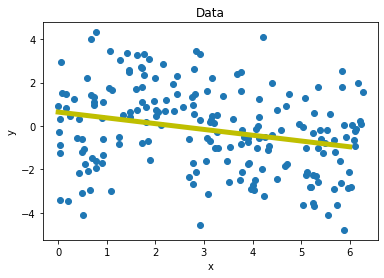

In [12]:
plt.scatter(train.x,train.target)
plt.plot(np.array([0,6]) , b1 * np.array([0,6]) + b0 , color = 'y', linewidth= 5 )
plt.xlabel('x')
plt.ylabel('y')
plt.title("Data")
pass

# calculate Columns $X^0,X^2, X^3 , X^4 , X^5$ 

In [151]:
def generate_data(df, m):
    df['x0'] = df['x'] ** 0
    for degree in range(2 , m+1):
        df['x'+str(degree)] = df['x'] ** degree
    return df
        

In [153]:
train = generate_data(train, 5)
train

,x,target,x0,x2,x3,x4,x5
0,2.391265,0.692274,1.0,5.718149,13.673611,32.697231,78.187750
1,4.214828,4.078137,1.0,17.764775,74.875471,315.587233,1330.145907
2,2.801953,2.614283,1.0,7.850938,21.997957,61.637233,172.704606
3,2.448590,1.465649,1.0,5.995595,14.680758,35.947165,88.019886
4,4.671812,-1.863850,1.0,21.825832,101.966195,476.366944,2225.497044
...,...,...,...,...,...,...,...
195,5.254647,-0.334566,1.0,27.611315,145.087714,762.384721,4006.062588
196,2.846755,3.444166,1.0,8.104014,23.070142,65.675043,186.960758
197,2.840102,-2.104304,1.0,8.066179,22.908772,65.063250,184.786265
198,1.618443,0.727167,1.0,2.619357,4.239279,6.861030,11.104184


In [154]:
test = generate_data(test, 5)
test

,x,target,x0,x2,x3,x4,x5
0,1.143986,0.910291,1.0,1.308704,1.497139,1.712706,1.959312
1,5.597518,-0.633189,1.0,31.332212,175.382635,981.707524,5495.125928
2,2.213371,0.800556,1.0,4.899010,10.843326,24.000302,53.121567
3,2.269057,0.765961,1.0,5.148620,11.682512,26.508284,60.148808
4,2.974508,0.166308,1.0,8.847701,26.317561,78.281810,232.849908
...,...,...,...,...,...,...,...
95,2.163373,0.829504,1.0,4.680182,10.124978,21.904102,47.386739
96,1.735575,0.986455,1.0,3.012219,5.227931,9.073464,15.747674
97,1.724554,0.988202,1.0,2.974087,5.128975,8.845195,15.254018
98,4.827944,-0.993331,1.0,23.309043,112.534756,543.311498,2623.077487


In [59]:
x_train = train[['x0','x','x2','x3','x4','x5']]
y_train = train['target']

In [23]:
x_test = test[['x0','x','x2','x3','x4','x5']]
y_test = test['target']

 # Calculate weights vector, using formula ${(X^TX)}^{-1}X^TY$

In [155]:
def WeightCalc(x , y):
    w = np.linalg.inv((x.T@x))@x.T@y
    return w

# Calculate weights vector with 10,25,50,100,200 number of train data

In [156]:
train_num = [10,25,50,100,200]
weights = []
for num in train_num:
        weights.append(WeightCalc(x_train[0:num] , y_train[0:num]))

# calculate MSE error

In [134]:
MSE = lambda X,y,w: np.mean((X.to_numpy()@w-y)**2)

# this function help us for drawing plot, also print MSE

In [191]:
def show_plot(x , y , w , shape):
    print('MES: ', round(MSE(x , y, w),4))
    print("number of data: " , shape)
    plt.plot(x['x'], y, 'o' , c = 'blue')
    x_l = np.linspace(0, 6, shape)
    y_l =  (w[0]*x['x0']) + (w[1] * x['x']) + (w[2] * x['x2']) + (w[3] * x['x3']) + (w[4] * x['x4']) + (w[5] * x['x5'])
    plt.plot(x_l ,y_l , color = 'pink', linewidth= 2 )
    plt.xlabel("x" , size = 15)
    plt.ylabel("target" , size = 15)
    return

# This table shows MSE of train set

In [192]:
table_of_std = [['Number of train data','MSE Train set']]
for num in train_num:
    table_of_std.append([train_num[train_num.index(num)] , [round(MSE(x_train[0:num] , y_train[0:num] , weights[train_num.index(num)]),3)]])
print(tabulate(table_of_std))

--------------------  -------------
Number of train data  MSE Train set
10                    [1.758]
25                    [3.582]
50                    [3.267]
100                   [3.147]
200                   [3.09]
--------------------  -------------


# This table shows MSE of test set

In [193]:
table_of_std = [['Number of train data','MSE test set']]
for num in train_num:
    table_of_std.append([train_num[train_num.index(num)] , [round(MSE(x_test, y_test,weights[train_num.index(num)]),3)]])
print(tabulate(table_of_std))

--------------------  ------------
Number of train data  MSE test set
10                    [3421.453]
25                    [1.066]
50                    [0.353]
100                   [0.152]
200                   [0.096]
--------------------  ------------


# Model on Train Set

## 10 data:

MES:  1.7583
number of data:  10


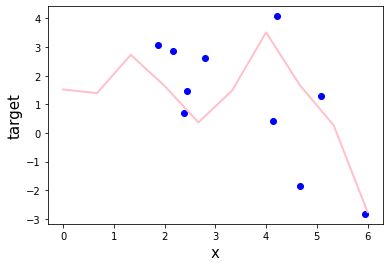

In [194]:
show_plot(x_train[0:10] , y_train[0:10], weights[0] , 10)

## 25 data

MES:  3.5818
number of data:  25


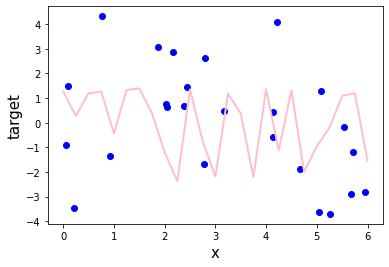

In [195]:
show_plot(x_train[0:25] , y_train[0:25], weights[1] , 25)

## 50 data

MES:  3.2674
number of data:  50


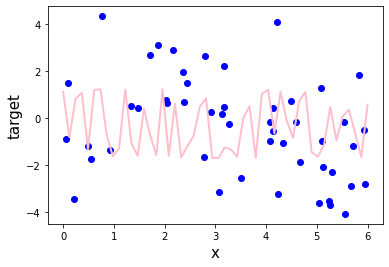

In [196]:
show_plot(x_train[0:50] , y_train[0:50], weights[2] , 50)

## 100 data

MES:  3.1473
number of data:  100


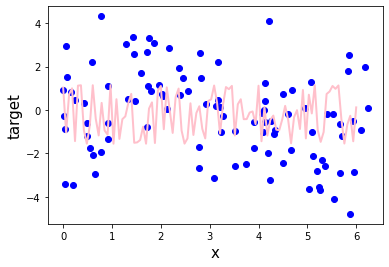

In [197]:
show_plot(x_train[0:100] , y_train[0:100], weights[3] , 100)

## 200 data

MES:  3.0896
number of data:  200


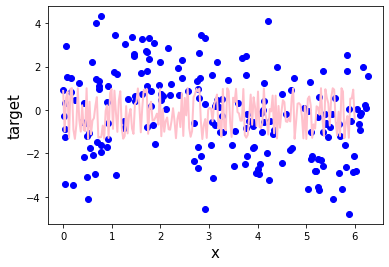

In [198]:
show_plot(x_train[0:200] , y_train[0:200], weights[4] , 200)

# model on test set

## model with learning 10 train data

MES:  3421.4526
number of data:  100


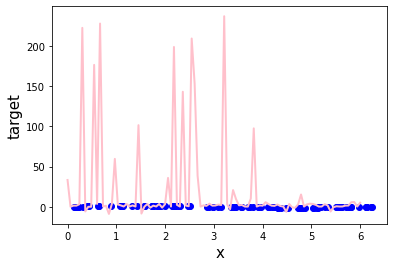

In [199]:
show_plot(x_test , y_test, weights[0] , len(x_test))

## model learning with 25 train data

MES:  1.0656
number of data:  100


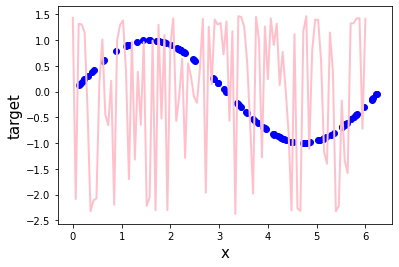

In [200]:
show_plot(x_test , y_test, weights[1] , len(x_test))

## model learning with 50 train data

MES:  0.3528
number of data:  100


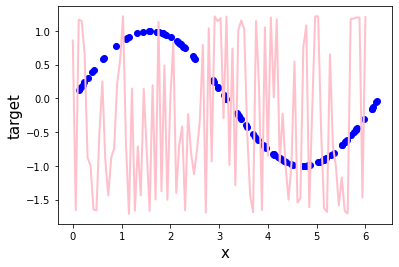

In [201]:
show_plot(x_test , y_test, weights[2] , len(x_test))

## model learning with 100 train data

MES:  0.1524
number of data:  100


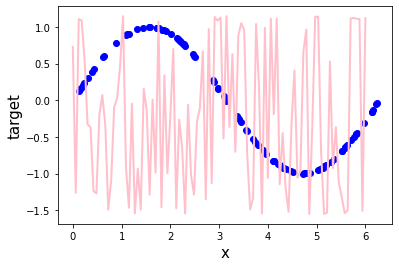

In [202]:
show_plot(x_test , y_test, weights[3] , len(x_test))

## model learning with 200 train data

MES:  0.0962
number of data:  100


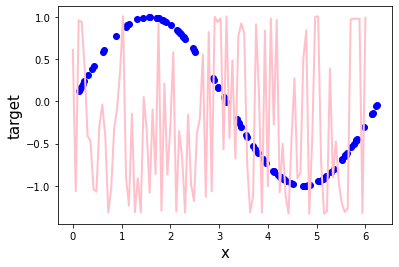

In [203]:
show_plot(x_test , y_test, weights[4] , len(x_test))

# Summary of Model and result

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
تعداد کم دیتا هنگام آموزش مدل، منجر به overfit میشود. همچنین اگر دادگان تست در دادگان آموزش وجود داشته باشند و تعدادشان زیاد باشد، منجر به underfit شدن مدل می شود.
    طبق مطالب کلاس، هر مدل با افزودن تعداد دادگان آموزش دقیق تر و بهتر می شود، البته تا زمانی این موضوع ادامه می یابد که مدل ما ظرفیت مناسب را داشته باشد. به عنوان مثال در سوال داده شده، خطای دادگان بر روی مدل آموزش دیده شده با 100 داده، تفاوت زیادی با مدل آموزش دیده شده با 200 داده ندارد. این موضوع در حالی است که اختلاف خطای مدل آموزش دیده شده با 10 داده و 25 داده، بسیار قابل توجه است. این موضوع به ما نشان می دهد که ظرفیت مدل ما در همین حد هست و با افزودن داده، تغییرات زیادی در خطای مدل رخ نمی دهد.
      اگر معیار خود را mse قرار دهیم، به ترتیب، مدل آموزش دیده شده با 200 داده، 100 داده، 50 داده، 25 داده و 10 داده مدل های برتر ما هستند. 